# CS506 - Spring 2018 - Homework 0
# Introducing Python

In [15]:
"""
    CS506 Spring 2018 - Homework 0
    Introducing Python
    author: Nikolakaki Sofia
    ------------------------------------------
"""

'\n    CS506 Spring 2018 - Homework 0\n    Introducing Python\n    author: Nikolakaki Sofia\n    ------------------------------------------\n'

In [16]:
"""
Import python packages here.
"""
%matplotlib inline
import csv
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import timeit


a) Convert the .csv file 'data.csv' into a list of lists, such that each row of the file is a list. ** (2 pts) **  

The function import_data should receive as input the name of a .csv file and output the requested list of lists. For the purpose of this exercise assume that each row in the .csv file contains a list of float numbers. Each row of the csv file should be converted into a list in python. That is, if a row has 4 numbers, you need to create a list of length 4 containing these numbers. At the end you need to have a list containing all these lists, i.e. a list that contains all the values of the .csv file. Your output should have a format similar to the following:  [[1343, 8474], [2550, 4954, 4494, 7637],[3467,5671,...] 

In [17]:
"""
The function import_data should receive as input the name of a .csv file and output a list of lists.

For the purpose of this exercise assume that each row in the .csv file contains a list of float numbers. 
Each row of the csv file should be converted into a list in python. That is, if a row has 4 numbers, you need to create
a list of length 4 containing these number.
At the end you need to have a list containing all these lists, i.e. a list that contains all the values of the .csv 
file.
Your output should be similar to the following: 
[[1343.6424, 8474.3373], [7637.7461, 2550.6902, 4954.3508, 4494.9106],.....]
"""

def import_data(filename):
    with open(filename) as csvfile:
        rows = csv.reader(csvfile)
        result = list(rows)
    return result

filename = 'data.csv'
data = import_data(filename)
print(data)


[['1343.6424411240123', '8474.337369372326'], ['7637.746189766141', '2550.690257394217', '4954.350870919409', '4494.910647887381'], ['6515.92972722763', '7887.233511355132', '938.5958677423489', '283.4747652200631', '8357.651039198698', '4327.670679050534', '7622.80082457942', '21.060533511106925'], ['4453.871940548014', '7215.400323407825', '2287.6222127045266', '9452.706955539223', '9014.274576114836', '305.89983033553534', '254.458609934608', '5414.124727934965', '9391.491627785106', '3812.0423768821242', '2165.993971306134', '4221.165755827173', '290.40787574867943', '2216.9166627303507', '4378.87593650572', '4958.122413818506'], ['2330.8445025757264', '2308.665415409843', '2187.810373376886', '4596.034657377336', '2897.8161459048556', '214.89705265908876', '8375.779756625729', '5564.543226524334', '6422.943629324455', '1859.062658947177', '9925.43412176065', '8599.465287952899', '1208.8995980580642', '3326.951853601291', '7214.844075832683', '7111.917696952796', '9364.405867994596

b) Code the algorithms i) **insertion sort**, ii) **merge sort**. ** (4 pts) **

In order to code merge sort you need to use recursion otherwise you will not receive any points.
In case you use any code available online you need to provide a reference to the source. 

In [18]:
"""
The function insertion_sort should receive as input a list and output the same list, only sorted in ascending order.
Use the recommended input to test that your algorithm runs correctly. Feel free to provide your own tests.
"""

def insertion_sort(alist):
    for i in range(1,len(alist)):
        num = alist[i]
        for j in range(0,i):
            if alist[j]>num:
                for m in range(i,j,-1):
                    alist[m]=alist[m-1]
                alist[j]=num
                break
    return alist

alist = [4453, 7215, 2287, 9452, 9014, 305, 254, 5414, 9391, 3812, 2165, 4221, 290, 2216, 4378, 4958]
alist = insertion_sort(alist)
print(alist)

[254, 290, 305, 2165, 2216, 2287, 3812, 4221, 4378, 4453, 4958, 5414, 7215, 9014, 9391, 9452]


In [19]:
"""
The function merge_sort should receive as input a list and output the same list, only sorted in ascending order.
Use the recommended input to test that your algorithm runs correctly. Feel free to provide your own tests.
"""

def merge_sort(alist):
    if len(alist)<2:
        return alist
    mid = int(len(alist)/2)
    left = merge_sort(alist[:mid])
    right = merge_sort(alist[mid:])
    return merge(left,right)
    
def merge(left, right):
    if not len(left) or not len(right):
        return left or right
    result =[]
    i=0
    j=0
    while (len(result)<len(left)+len(right)):
        if left[i]<right[j]:
            result.append(left[i])
            i=i+1
        else:
            result.append(right[j])
            j=j+1
        if i == len(left) or j == len(right):
            result.extend(left[i:] or right[j:])
            break
    return result


alist = [4453, 7215, 2287, 9452, 9014, 305, 254, 5414, 9391, 3812, 2165, 4221, 290, 2216, 4378, 4958]
alist=merge_sort(alist)
print(alist)
list1=[]
list2=[]

for row in data:
    list1.extend(insertion_sort(row))
    list2.extend(merge_sort(row))
# if the result of insertion and merge are the same, which means correct, return true
print(list1==list2)




[254, 290, 305, 2165, 2216, 2287, 3812, 4221, 4378, 4453, 4958, 5414, 7215, 9014, 9391, 9452]
True


Before moving to the next step run both algorithms for all inputs of the data.csv file, i.e. all lists in the list of lists and confirm that all the outputs are correct.

c) Perform profiling using the python library timeit. **(2 pts) **

You need to store for each sorting algorithm, the size of the input dataset and the time that the algorithm requires to do the sorting in seconds. More information on the timeit library can be found [here](https://docs.python.org/2/library/timeit.html)  

In [20]:
insert_time={}
merge_time={}
for row in data:
    time1=0
    time2=0
#     run each method 4 times, get average time for each size of dataset
    
    for i in range(1,5):
        begin = timeit.default_timer()
        merge_sort(row)
        time2 += timeit.default_timer()-begin
    merge_time[len(row)]=time2/4
    for i in range(1,5):
        begin = timeit.default_timer()
        insertion_sort(row)
        time1 += timeit.default_timer()-begin
    insert_time[len(row)]=time1/4
print(insert_time)
print(merge_time)


{2: 1.4767520042369142e-06, 4: 2.210499587818049e-06, 8: 4.8724996304372326e-06, 16: 1.2778749805875123e-05, 32: 3.8075500924605876e-05, 64: 0.0001415547485521529, 128: 0.0004751529977511382, 256: 0.0023208327493193792, 512: 0.008475387003272772, 1024: 0.03514224474929506, 2048: 0.15565445450010884, 4096: 0.6155632502504886, 8192: 2.5460228594984073, 16384: 9.553139802501391, 32768: 45.947969772749275}
{2: 3.836999894701876e-06, 4: 7.078249836922623e-06, 8: 1.7336000382783823e-05, 16: 0.00011254375021962915, 32: 8.869649900589138e-05, 64: 0.0002021609998337226, 128: 0.00043342124990886077, 256: 0.0010392905005573994, 512: 0.0022529435009346344, 1024: 0.004479516750507173, 2048: 0.009933532501236186, 4096: 0.022556235247975565, 8192: 0.04729049875277269, 16384: 0.09633952450167271, 32768: 0.2006773350003641}


d) Plot the performance of the algorithms for all inputs using matplotlib.pyplot. **(2 pts) **

In order to do so you need to create one figure that shows the performance of both. The x-axis will be the input size, while the y-axis will be the time in seconds of the algorithms. Your figure needs to contain i) a title, ii) labels on the axes, iii) a legend.

Note that you might need to use the '%matplotlib inline' command at the beginning in order for the plots to show.

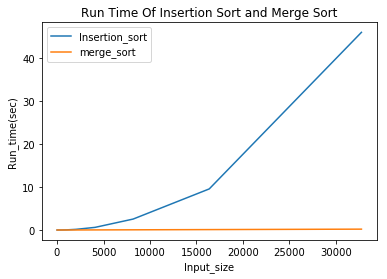

In [21]:
x_insert = insert_time.keys()
y_insert = insert_time.values()
x_merge = merge_time.keys()
y_merge = merge_time.values()
x1=[]
x2=[]
y1=[]
y2=[]

for i in x_insert:
    x1.append(i)
for i in x_merge:
    x2.append(i)
for i in y_insert:
    y1.append(i)
for i in y_merge:
    y2.append(i)

plt.figure()
plt.plot(x1,y1, label='Insertion_sort')
plt.plot(x2,y2, label='merge_sort')
plt.title('Run Time Of Insertion Sort and Merge Sort')
plt.xlabel('Input_size')
plt.ylabel('Run_time(sec)')
plt.legend(loc = 'best')
plt.show()


Please report any interesting observations. Are the results what you would expect? ** (1 pt) **